In [29]:
!pip install pandas plotnine

In [30]:
from plotnine import *

In [31]:
# Import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns




from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [32]:
# supress warnings from plotnine

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [33]:
app1 = pd.read_csv("app.csv")
app1.head()

,ID,GENDER,Car,Property,Children,Income,Job,Education,Martial_Status,Housing,Age,Employed_Years,Family_Size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59,3,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1


In [34]:
# working category has most. (basically 'other')
# commerercial associate next

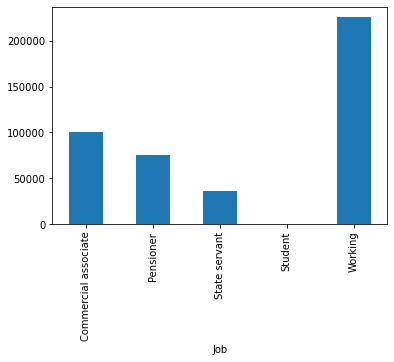

In [35]:
# show graph of type of jobs
app1.groupby('Job').Job.count().plot.bar(ylim=0)
plt.show()

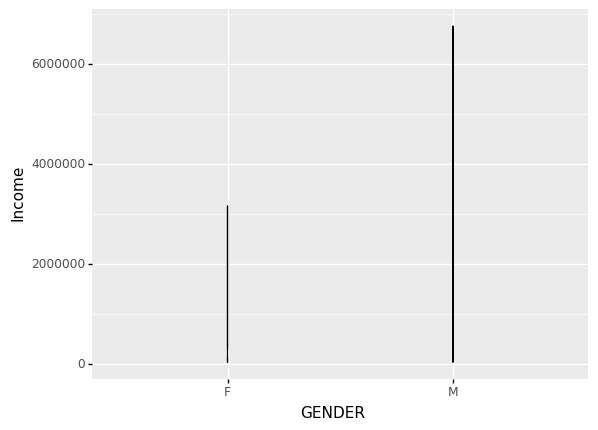

<ggplot: (8764841053221)>

In [36]:
# ggplot male and female per income


ggplot(app1)+ aes(x = 'GENDER', y = 'Income')+ geom_line()


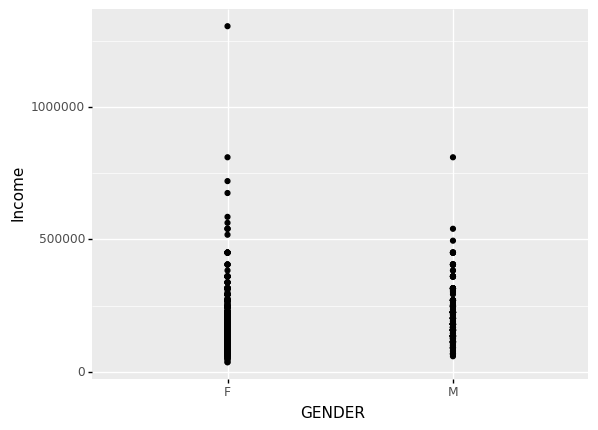

<ggplot: (8764831992327)>

In [37]:
# add a mean line for above

ggplot(app1.sample(1000), aes(x = 'GENDER', y = 'Income'))+ geom_point() + stat_smooth()

<AxesSubplot:ylabel='Car'>

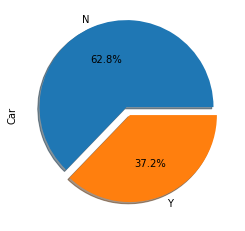

In [38]:
# how many own a car

app1['Car'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

<AxesSubplot:ylabel='GENDER'>

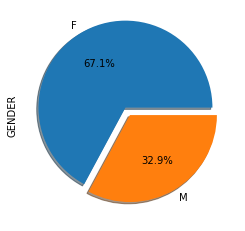

In [39]:
# gender of applicants 

app1['GENDER'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

<AxesSubplot:xlabel='Education'>

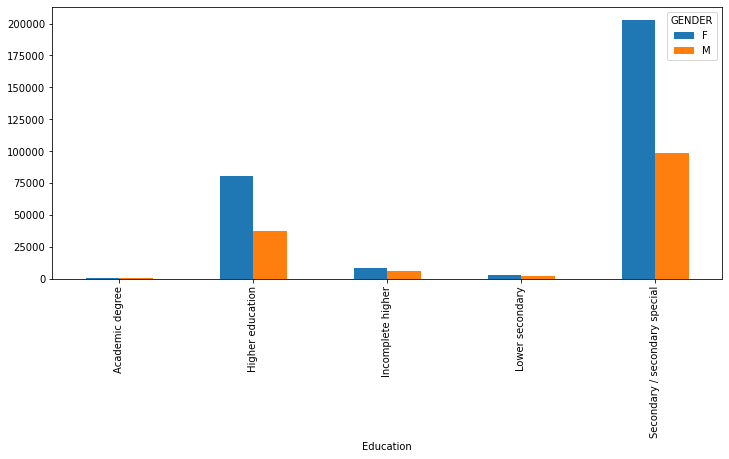

In [40]:
# gender per education and children

g = app1.pivot_table(index='Education', columns='GENDER', aggfunc='size')

g.plot(kind='bar', figsize=(12, 5))

<AxesSubplot:ylabel='GENDER,Education'>

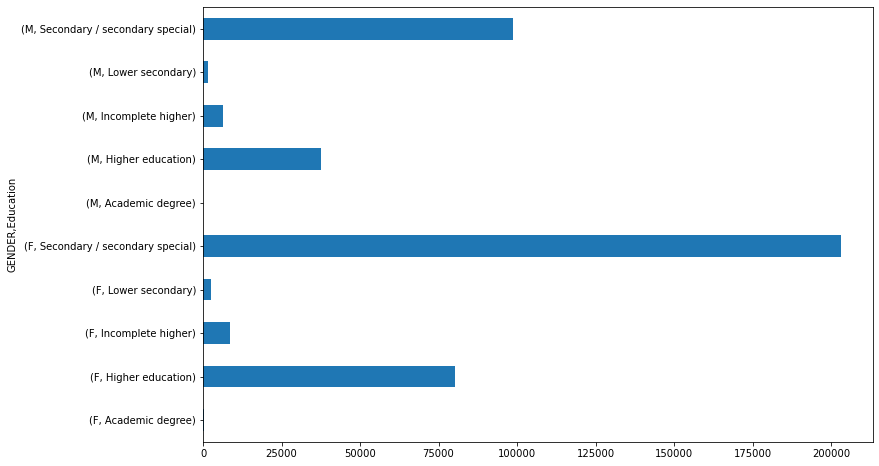

In [41]:
# groupby gender and education

app1.groupby(['GENDER', 'Education']).size().plot(kind='barh', figsize = (12, 8))

<AxesSubplot:ylabel='GENDER,Job'>

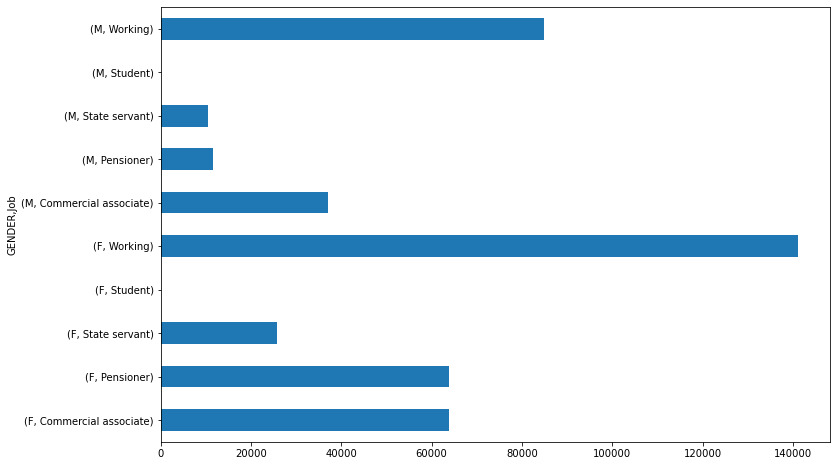

In [42]:
# grouby by gender and job

app1.groupby(['GENDER', 'Job']).size().plot(kind='barh', figsize = (12, 8))

<AxesSubplot:ylabel='GENDER,Housing'>

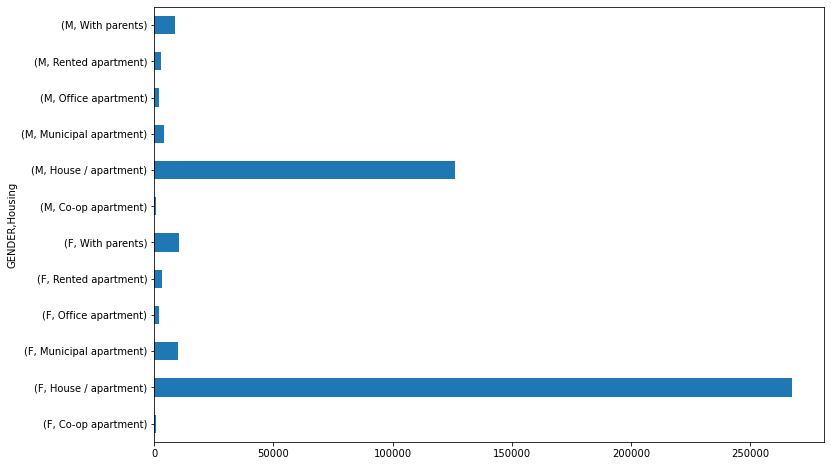

In [43]:
# gender and housing

app1.groupby(['GENDER', 'Housing']).size().plot(kind='barh', figsize = (12, 8))

<AxesSubplot:ylabel='GENDER,Job'>

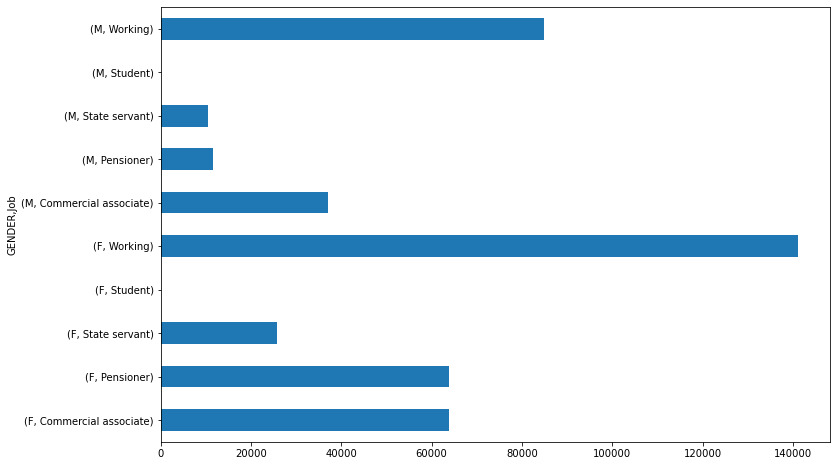

In [44]:
app1.groupby(['GENDER', 'Job']).size().plot(kind='barh', figsize = (12, 8))

<AxesSubplot:xlabel='Employed_Years'>

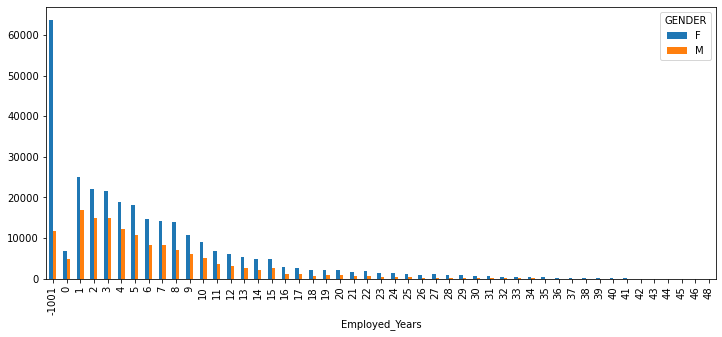

In [45]:
# gender married



h = app1.pivot_table(index='Employed_Years', columns='GENDER', aggfunc='size')

h.plot(kind='bar', figsize=(12, 5))

In [47]:
# do EDA on credit df

In [48]:
credit3 = pd.read_csv("credit2.csv")
credit3.head()

,ID,MONTHS_BALANCE,STATUS2,-60,-59,-58,-57,-56,-55,-54,...,-4,-3,-2,-1,0,open_month,end_month,window,Good,Bad
0,5001711,-3,Good,0,0,0,0,0,0,0,...,0,0,0,0,X,-3,0,4,1,0
1,5001712,-8,Good,0,0,0,0,0,0,0,...,C,C,C,C,C,-18,0,19,0,0
2,5001713,-4,Good,0,0,0,0,0,0,0,...,X,X,X,X,X,-21,0,22,22,0
3,5001714,-6,Good,0,0,0,0,0,0,0,...,X,X,X,X,X,-14,0,15,15,0
4,5001715,-21,Good,0,X,X,X,X,X,X,...,X,X,X,X,X,-59,0,60,60,0


In [27]:
credit3['STATUS2'] = credit3['STATUS']

In [28]:
credit3['STATUS2'].unique()

array(['0', 'X', 'C', '1', '5'], dtype=object)

In [49]:
app1.to_csv('app1.csv', index=False)

In [50]:
credit3.to_csv('credit3.csv', index=False)